# Project: Flight Analysis
## Goal: Predict price of tickets using other features via machine learning
| Column  | Description |
| ------------- | ------------- |
| (1) Airline  | IndiGo |
| (2) Date_of_Journey | 24/03/2019 |
| (3) Source  | Banglore |
| (4) Destination  | New Delhi |
| (5) Route | BLR → DEL |
| (6) Dep_Time  | 22:20 |
| (7)Arrival_Time  | 01:10 |
|(8) Duration | 2h 50m |
| (9) Total_Stops  |non-stop |
| (10) Additional Info  |In-flight meal not included |
| **Price** | **3898** |

## **Team 3**:
- Ali Alkhalaf
- Hend Kordy
- Khalid Alharthi
- Thekra Alqarni

# Step 1: Importing packages/libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Reading the cleaned data

In [5]:
df = pd.read_csv("../data_cleaning/df_cleaned.csv")


In [6]:
df.head(1)

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,2019,3,24,6,22,...,night,1,10,late night,True,2,50,170,3898,No info


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   airline           10462 non-null  object
 1   embarked          10462 non-null  object
 2   destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   stops             10462 non-null  object
 5   journey_year      10462 non-null  int64 
 6   journey_month     10462 non-null  int64 
 7   journey_day       10462 non-null  int64 
 8   weekday           10462 non-null  int64 
 9   dep_hour          10462 non-null  int64 
 10  dep_min           10462 non-null  int64 
 11  departure_period  10462 non-null  object
 12  Arrival_hour      10462 non-null  int64 
 13  Arrival_min       10462 non-null  int64 
 14  arrival_period    10462 non-null  object
 15  Arrived_next_day  10462 non-null  bool  
 16  duration_hours    10462 non-null  int64 
 17  duration_min

| Column  | Description |
| ------------- | ------------- |
| embarked  | Name of the city of departure |
| destination | Name of the city of arrival |
| 	weekday  | Monday-Sunday = 0-6 |
| Arrived_next_day  | True for flights that arrive the next day |

# Step 3: Data Viz

In [11]:
# Getting a look at the airlines, to see if airline comapnies are over-repsented which could lead to bias
df.airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

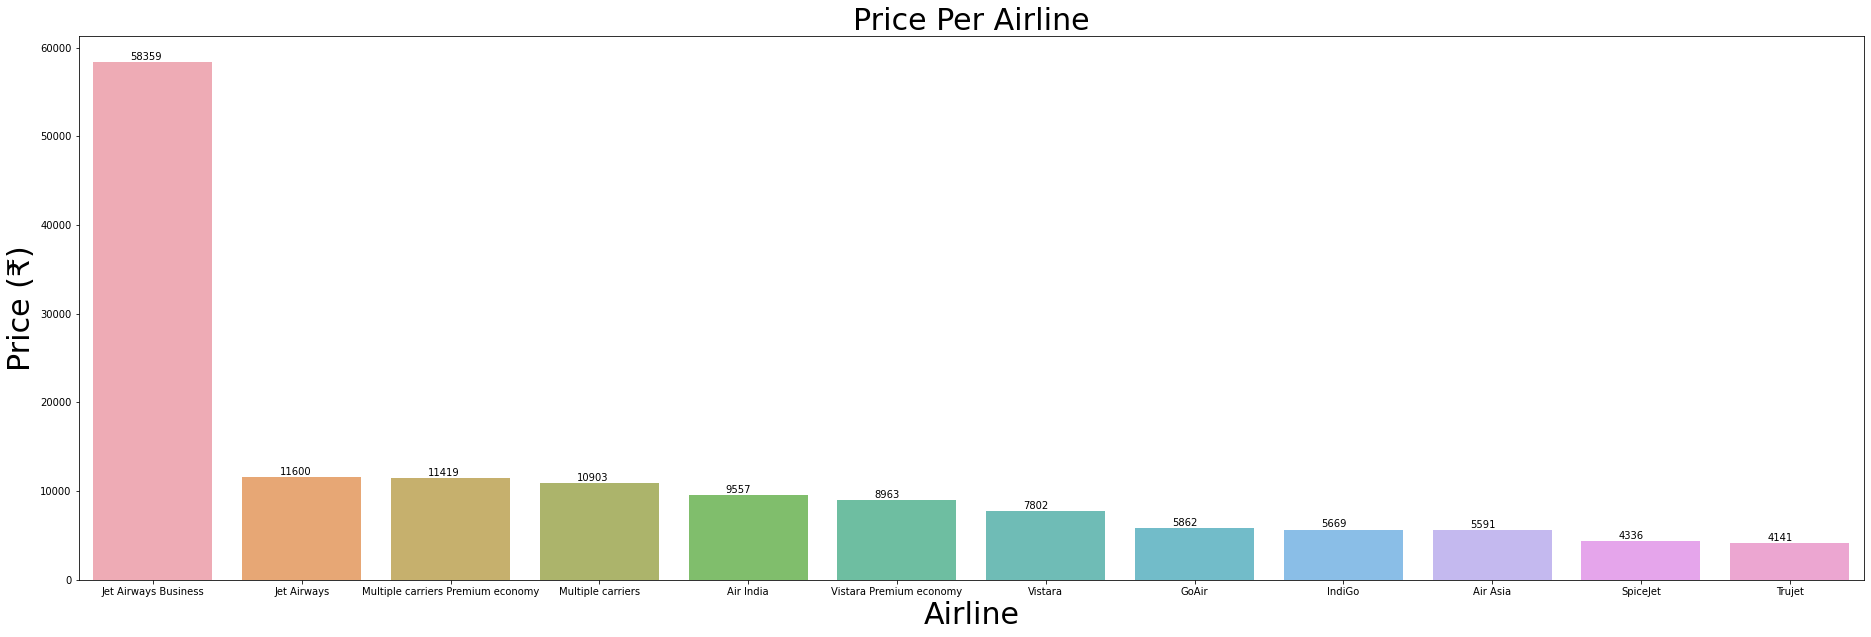

In [13]:
# Let's see how the prices of different airlines/classes look like
Price_Airline  = df.groupby('airline')['price'].mean().sort_values(ascending=False)
Price_Airline = Price_Airline[:12,]
plt.figure(figsize=(32,10))
plt_Price_Airline = sns.barplot(Price_Airline.index, Price_Airline, alpha=0.8)
plt.title('Price Per Airline', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Airline', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Price_Airline.patches:
    plt_Price_Airline.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

Text(0.5, 0, 'Airline')

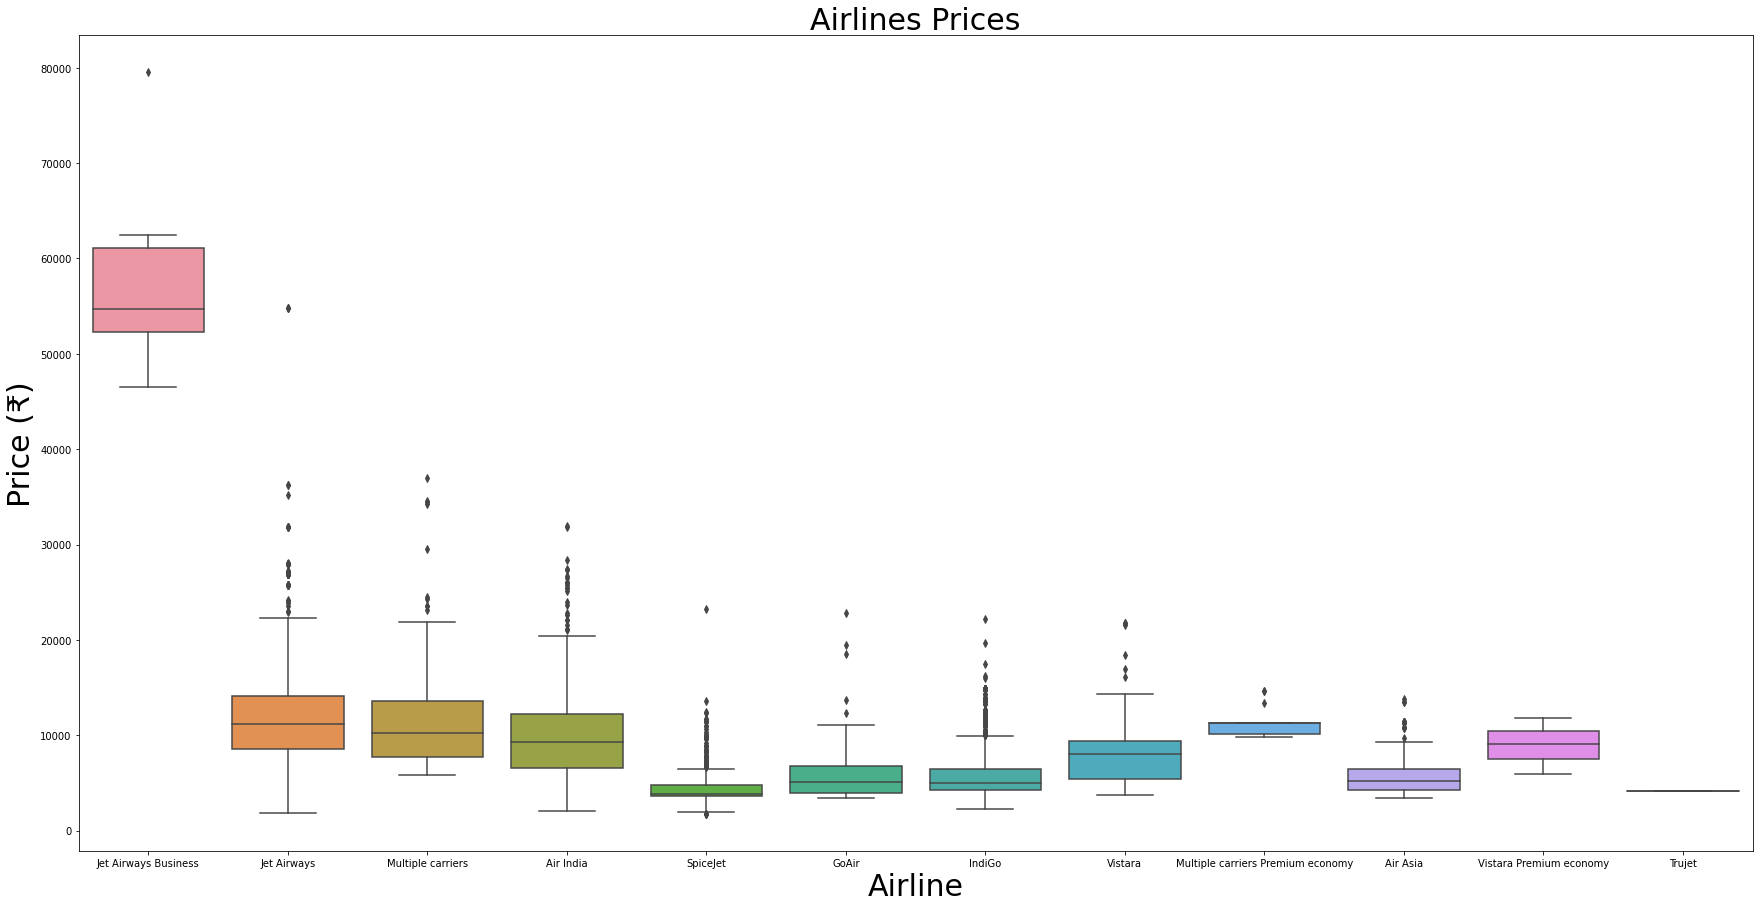

In [15]:
# Lets get a general look at the airlines, and thier prices
plt.figure(figsize=(30,15))
sns.boxplot(x='airline',y='price',data=df.sort_values('price',ascending=False))
plt.title('Airlines Prices', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Airline', fontsize=30)

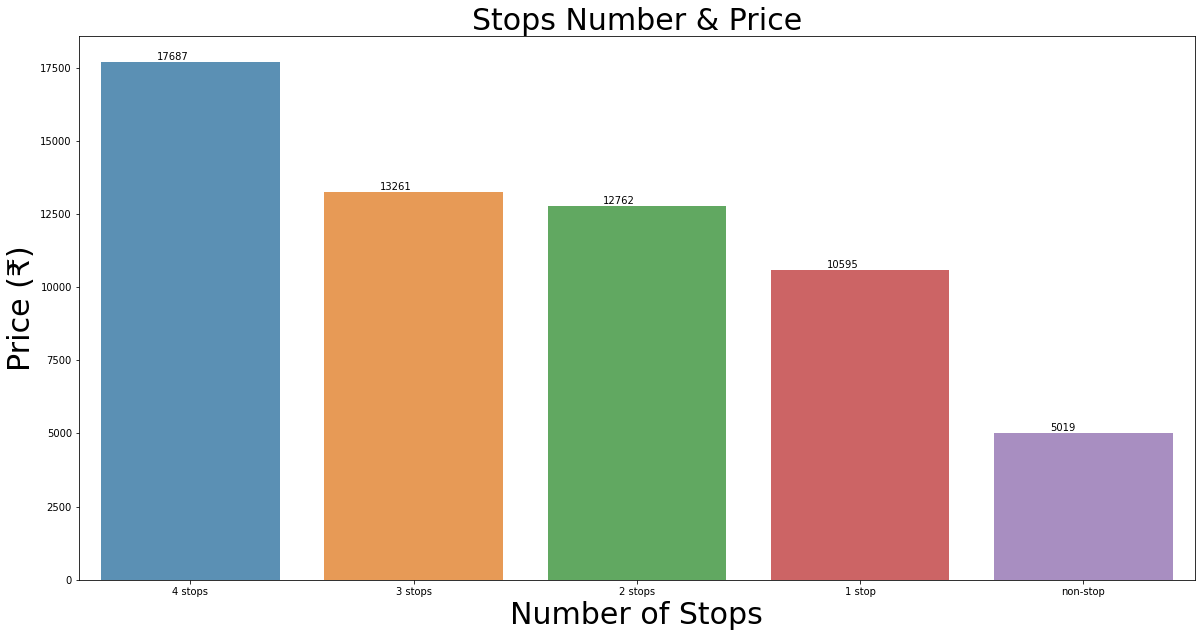

In [16]:
# What about the number of stops?
Price_Stops  = df.groupby('stops')['price'].mean().sort_values(ascending=False)
Price_Stops = Price_Stops[:12,]
plt.figure(figsize=(20,10))
plt_Price_Stops = sns.barplot(Price_Stops.index, Price_Stops, alpha=0.8)
plt.title('Stops Number & Price', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Number of Stops', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Price_Stops.patches:
    plt_Price_Stops.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()


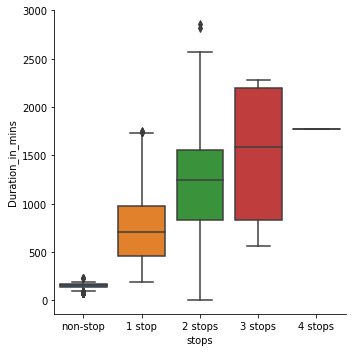

In [45]:
# Is there a correlation between number of stops and flight duration
sns.catplot(data = df, x = 'stops', y = 'Duration_in_mins', kind = 'box', order = ['non-stop','1 stop', '2 stops', '3 stops', '4 stops'])

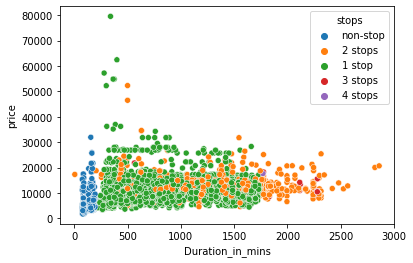

In [51]:
# Obviously, let's see how the duration is related to the price
g =sns.scatterplot(x = df['Duration_in_mins'],y = df['price'],hue="stops",data=df);

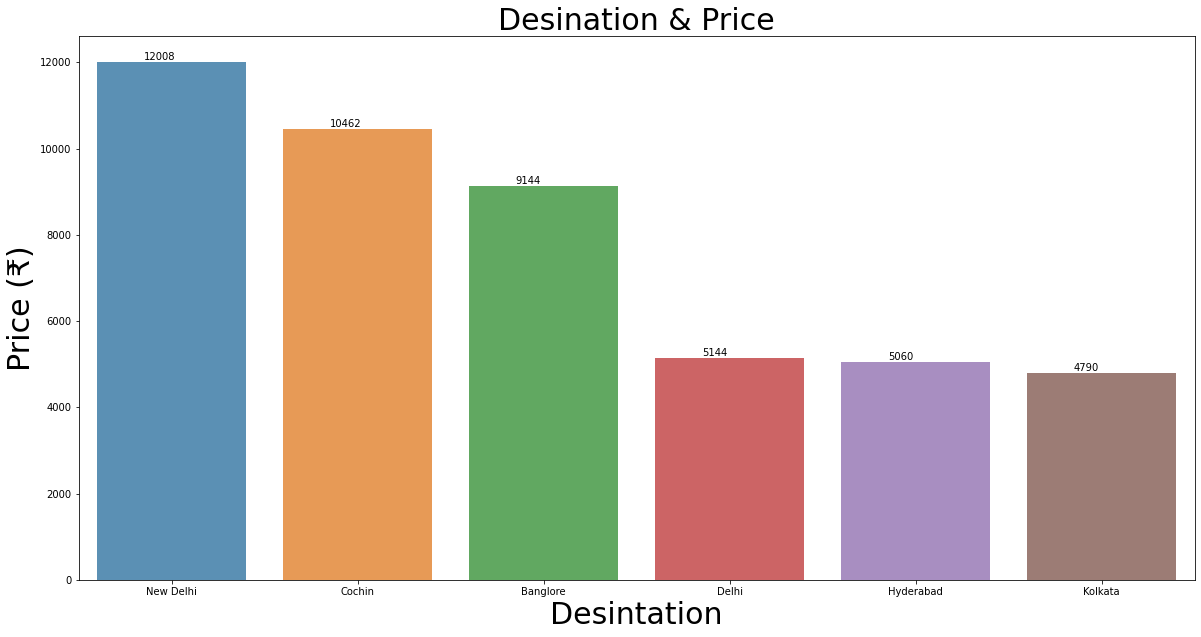

In [52]:
# What abut the destination?
Price_Destination = df.groupby('destination')['price'].mean().sort_values(ascending=False)
Price_Destination = Price_Destination[:12,]
plt.figure(figsize=(20,10))
plt_Price_Destination = sns.barplot(Price_Destination.index, Price_Destination, alpha=0.8)
plt.title('Desination & Price', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Desintation', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Price_Destination.patches:
    plt_Price_Destination.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

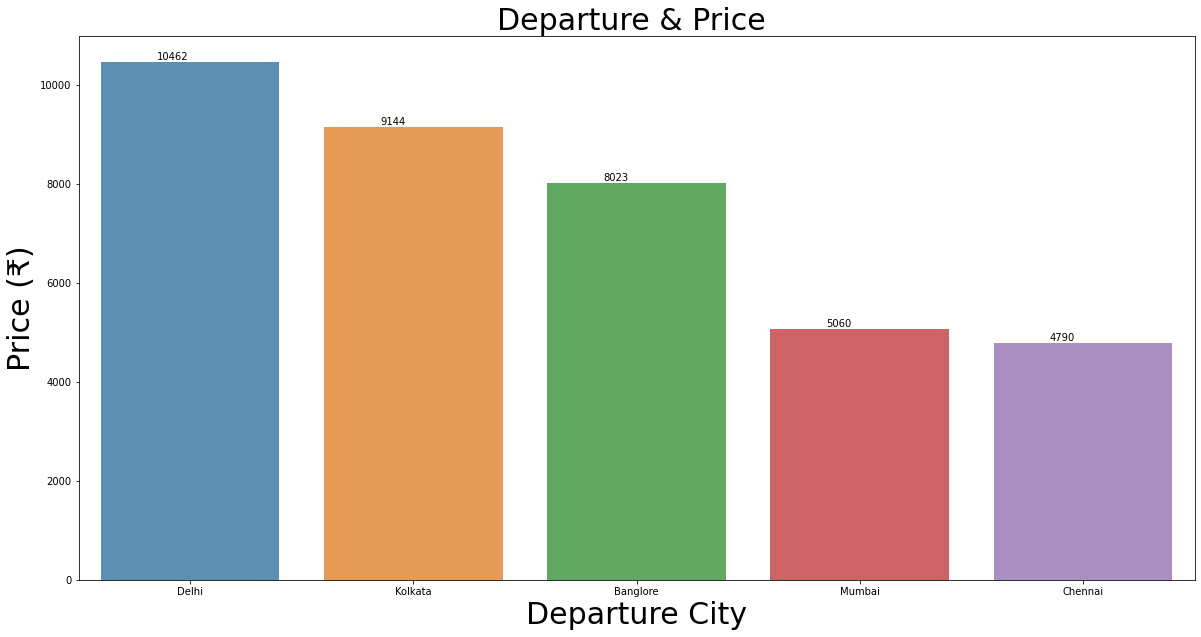

In [24]:
# Maybe, the departure city??
Price_Embarked = df.groupby('embarked')['price'].mean().sort_values(ascending=False)
Price_Embarked = Price_Embarked[:12,]
plt.figure(figsize=(20,10))
plt_Price_Embarked = sns.barplot(Price_Embarked .index, Price_Embarked, alpha=0.8)
plt.title('Departure & Price ', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Departure City', fontsize=30)
plt.xticks(fontsize= 10) 
for p in plt_Price_Embarked.patches:
    plt_Price_Embarked.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

In [54]:
# Now we want to look at the dates of flights, like the effect of weekend/weekdays and holidays
df.	journey_month.value_counts()

5    3395
6    3311
3    2678
4    1078
Name: journey_month, dtype: int64

**India's biggest holidays in 2019**:<br>
**Holi** = Thursday, 21 March <br>
**Maha Shivaratri** = Monday, 4 March <br>

In [29]:
df.groupby(['journey_month','weekday'])['price'].describe()

count          mean           std     min       25%  \
journey_month weekday                                                        
3             0        156.0   8927.858974   6780.571478  1966.0   4383.25   
              1        141.0  11599.851064   3567.363278  4050.0  11088.00   
              2        687.0  11172.448326   5226.946458  1760.0   6638.00   
              3        412.0   7983.269417   2947.084624  1760.0   6016.25   
              4        360.0  13954.444444  10339.402973  2051.0   6566.00   
              5        299.0  10411.826087   4703.288914  3604.0   6749.00   
              6        623.0  10457.964687   4935.050201  2051.0   6566.00   
4             0        345.0   6841.530435   2935.426849  1966.0   4545.00   
              1        125.0   6463.984000   2822.208075  3420.0   4442.00   
              2        202.0   4655.920792   1146.269313  1760.0   3972.00   
              3         67.0   5345.940299   1155.456461  3842.0   4424.00   
              4         63.0   5125.031746   1036.971381  3842.0   4301.50   
              5        194.0   5002.417526    990.615429  3384.0   4320.00   
              6         82.0   5574.000000   1049.098649  3944.0   4676.00   
5             0        650.0   8843.546154   4059.278728  1966.0   5058.75   
              1        482.0   9738.126556   3936.388121  1966.0   6795.00   
              2        676.0   8696.315089   3749.709548  1966.0   5199.00   
              3        466.0   9600.004292   4007.131978  1966.0   6597.25   
              4        376.0   7795.789894   3970.123676  1966.0   4321.00   
              5        486.0   9721.154321   3789.167942  1966.0   6941.75   
              6        259.0   8523.447876   3925.184185  1966.0   4805.00   
6             0        656.0   8663.402439   3759.586561  1966.0   5628.25   
              1        105.0   4708.371429   1798.607379  1966.0   3544.00   
              2        483.0   9161.322981   3512.935118  2018.0   6150.50   
              3        829.0   9111.597105   3761.364752  1966.0   6094.00   
              4        109.0   4951.724771   1784.987695  1966.0   3808.00   
              5        644.0   8693.805901   3783.117517  1966.0   5565.75   
              6        485.0   9554.967010   3555.046866  1966.0   6529.00   

                           50%       75%      max  
journey_month weekday                              
3             0        10910.0  12285.00  54827.0  
              1        11949.0  13818.00  23844.0  
              2        11668.0  15148.00  52286.0  
              3         7696.0   9710.00  14630.0  
              4         9166.5  21782.00  79513.0  
              5         9587.0  14054.00  34609.0  
              6        10199.0  13760.00  46491.0  
4             0         6016.0   7981.00  14152.0  
              1         5404.0   7364.00  17532.0  
              2         4648.0   5177.75   8041.0  
              3         5199.0   5920.00   9565.0  
              4         4991.0   5618.00   7230.0  
              5         4824.0   5406.25   7230.0  
              6         5229.0   6435.00   7453.0  
5             0         8399.5  12899.00  21220.0  
              1         9664.0  13030.00  16656.0  
              2         8565.0  11468.00  16841.0  
              3         9315.5  12374.00  34274.0  
              4         6963.5  10845.00  21220.0  
              5         9664.0  12676.75  19645.0  
              6         8587.0  11451.00  14782.0  
6             0         8041.0  11508.00  18805.0  
              1         4050.0   5202.00  11983.0  
              2         8611.0  12489.00  18805.0  
              3         9188.0  12193.00  18805.0  
              4         4805.0   5679.00  11983.0  
              5         8615.0  11078.75  18805.0  
              6        10263.0  12535.00  18805.0

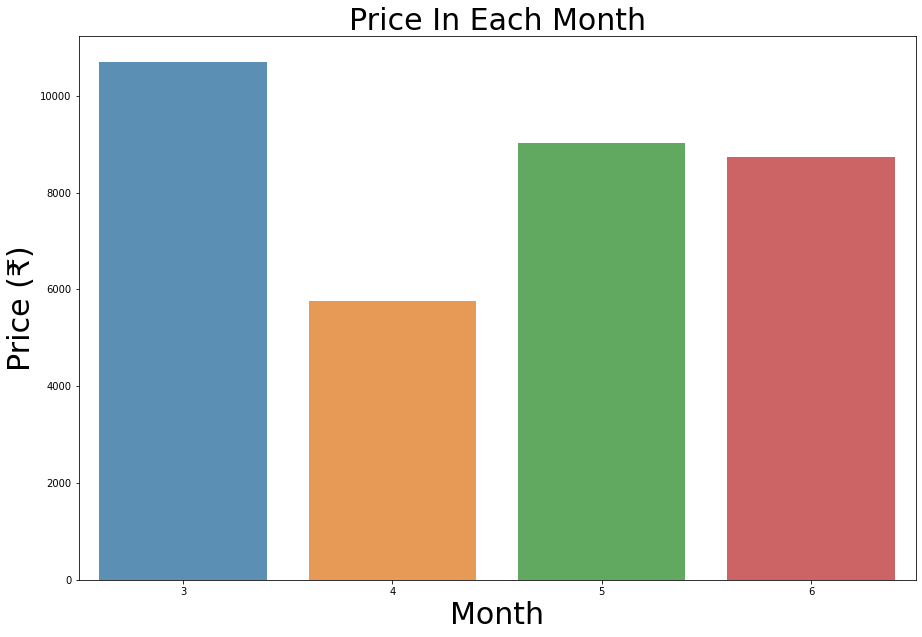

In [30]:
# What about the journey months?
Price_Month = df.groupby('journey_month')['price'].mean().sort_values(ascending=False)
Price_Month = Price_Month[:12,]
plt.figure(figsize=(15,10))
sns.barplot(Price_Month.index, Price_Month, alpha=0.8)
plt.title('Price In Each Month', fontsize=30)
plt.ylabel('Price (₹)', fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.xticks(fontsize= 10) 
plt.show()

## how is price affected by departure/arrival hour?
we expect to see higher prices for flights b/w 10am - 9pm, and lower prices for flights b/w 12pm - 6 am


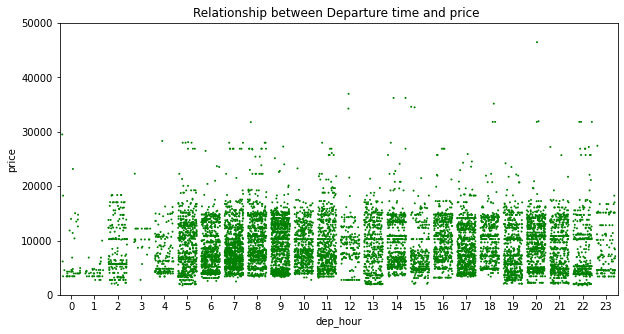

In [36]:

plt.figure(figsize=(10,5))
sns.stripplot(data = df, x = 'dep_hour', y = 'price', jitter = 0.4, size = 2, color = 'green')
plt.ylim(0, 50000)
plt.title('Relationship between Departure time and price ')
plt.show()

The plot above shows as some there are dep_hours that certain hours with more flights, but we cannot see if the average price is affected based on dep_hour
we need a plot to see the mean values instead of a scatter plot

<AxesSubplot:xlabel='dep_hour', ylabel='price'>

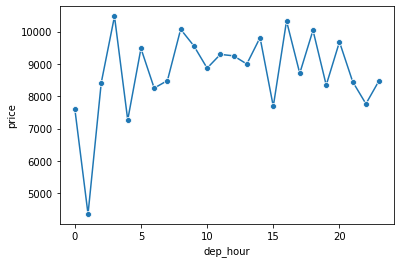

In [37]:
dep_hours_means = df.groupby('dep_hour', as_index = False)['price'].mean()
sns.lineplot(x = 'dep_hour', y= 'price', data=dep_hours_means, marker = 'o')


we can see that the lowest 3 means are in the period we expected, at at 12am, 1am, 4am.
### we want to see how arrival_hour also affects the average mean price

In [46]:
dep_hours_means['when'] = 'departure'
dep_hours_means.rename({"dep_hour" : 'hour'}, axis = 1, inplace= True)
arr_hours_mean = df.groupby('Arrival_hour', as_index=False)['price'].mean()
arr_hours_mean['when'] = 'arrival'
arr_hours_mean.rename({"Arrival_hour" : 'hour'}, axis = 1, inplace= True)
all_means = dep_hours_means.append(arr_hours_mean)
#all_means

In [47]:
all_means['index'] = range(0, 48)
all_means.set_index(['index'], inplace= True)


In [48]:
all_means.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
           dtype='int64', name='index')

<AxesSubplot:xlabel='hour', ylabel='price'>

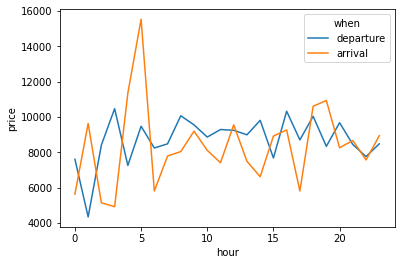

In [49]:
sns.lineplot(data=all_means, x= 'hour', y= 'price', hue = 'when')

Text(0.5, 1.0, 'Relationship between Day of the Week and price ')

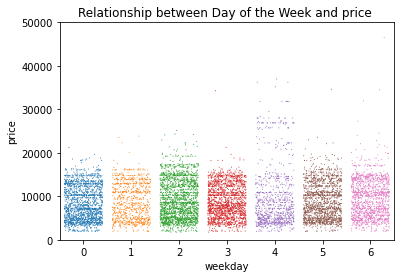

In [50]:
week_airline = df.groupby(['weekday', 'airline'], as_index= False)['price'].mean()
sns.stripplot(data = df, x = 'weekday', y = 'price', jitter = 0.4, size = 1)
plt.ylim(0, 50000)
plt.title('Relationship between Day of the Week and price ')